In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import random

# # Spam templates
# spam_templates = [
#     "Congratulations! You've won a {item}! Click here to claim now.",
#     "You have been selected for a {offer}. Reply YES to claim.",
#     "URGENT! Your account will be suspended. Verify at {link}",
#     "Get a free {item} when you sign up now!",
#     "Limited-time offer: {discount} off on all products!",
#     "You’re pre-approved for a {loan} loan. Apply today.",
#     "Win a brand new {item}! Just answer this question.",
#     "Claim your {discount} discount voucher at {link}",
#     "Your prize is waiting! Visit {link} to unlock now.",
#     "Don’t miss this {offer}. Act now!"
# ]

# # Dynamic fields
# items = ['iPhone', 'gift card', 'trip to Bali', 'laptop', 'smartwatch']
# offers = ['free subscription', 'special reward', 'bonus offer']
# discounts = ['50%', '70%', '90%']
# links = ['bit.ly/win', 'spamnow.com/claim', 'getprize.net']
# loans = ['$10,000', '$5,000', '$25,000']

# # Generate 4078 synthetic spam messages
# synthetic_spam = []
# for _ in range(4078):
#     template = random.choice(spam_templates)
#     msg = template.format(
#         item=random.choice(items),
#         offer=random.choice(offers),
#         discount=random.choice(discounts),
#         link=random.choice(links),
#         loan=random.choice(loans)
#     )
#     synthetic_spam.append(['spam', msg])

# # Create new DataFrame
# df_synthetic = pd.DataFrame(synthetic_spam, columns=['Category', 'Message'])

# # Combine and shuffle
# df_balanced = pd.concat([df, df_synthetic], ignore_index=True)
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# # Save new CSV
# df_balanced.to_csv('spam_balanced.csv', index=False)
# print("New class distribution:\n", df_balanced['Category'].value_counts())

New class distribution:
 Category
ham     4825
spam    4825
Name: count, dtype: int64


In [74]:
df = pd.read_csv('spam_balanced.csv')
df.head()

,Category,Message
0,ham,Does uncle timi help in clearing cars
1,ham,"Ya ok, then had dinner?"
2,ham,"Its ok, called mom instead have fun"
3,spam,Had your mobile 10 mths? Update to latest Oran...
4,ham,Watching ajith film ah?


In [75]:
df.groupby('Category').describe()

Message                                                      
           count unique                                       top freq
Category                                                              
ham         4825   4516                    Sorry, I'll call later   30
spam        4825    683  Don’t miss this special reward. Act now!  153

In [76]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})
df.head()

,Category,Message
0,0,Does uncle timi help in clearing cars
1,0,"Ya ok, then had dinner?"
2,0,"Its ok, called mom instead have fun"
3,1,Had your mobile 10 mths? Update to latest Oran...
4,0,Watching ajith film ah?


In [77]:
df['Message'] = df['Message'].astype(str)

Class distribution:
 Category
0    4825
1    4825
Name: count, dtype: int64


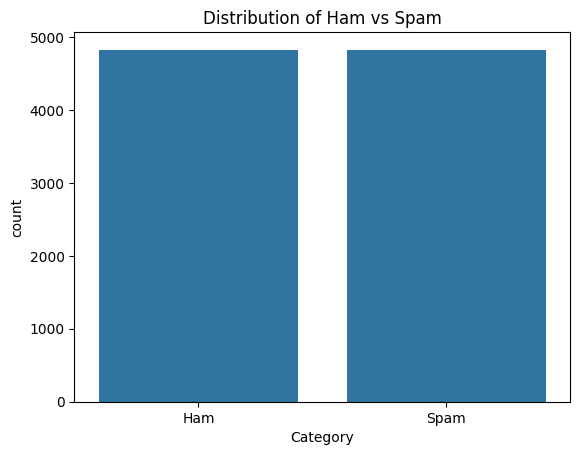

In [78]:
print("Class distribution:\n", df['Category'].value_counts())
sns.countplot(data=df, x='Category')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title('Distribution of Ham vs Spam')
plt.show()

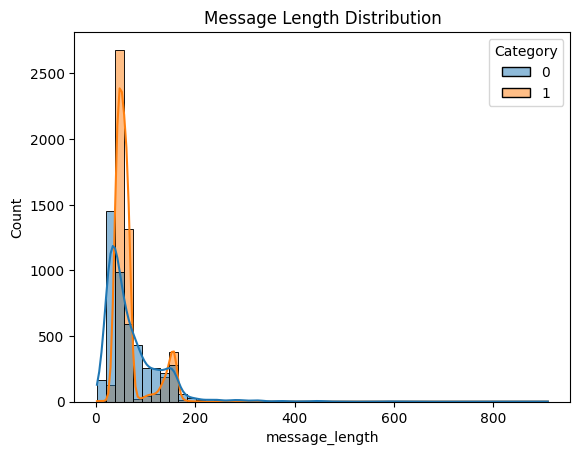

In [79]:
df['message_length'] = df['Message'].apply(len)
sns.histplot(data=df, x='message_length', hue='Category', bins=50, kde=True)
plt.title('Message Length Distribution')
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [101]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df['Message'])
y = df['Category']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [103]:
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [104]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [105]:
def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

In [106]:
results = [
    evaluate_model(y_test, svm_pred, "SVM"),
    evaluate_model(y_test, rf_pred, "Random Forest")
]

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
           Model  Accuracy  Precision    Recall  F1 Score
0            SVM  0.989119   0.996842  0.981347  0.989034
1  Random Forest  0.990155   0.998945  0.981347  0.990068


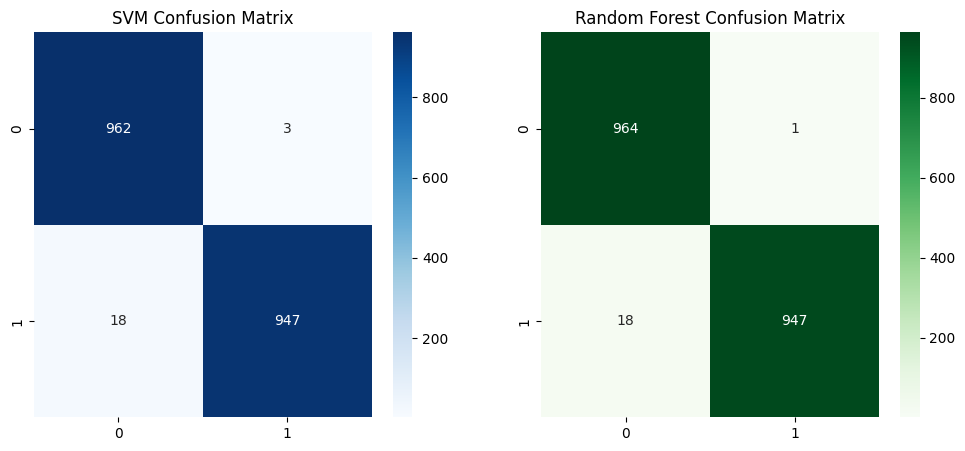

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title('SVM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', ax=axs[1], cmap='Greens')
axs[1].set_title('Random Forest Confusion Matrix')
plt.show()

In [114]:
def predict_message(model, messages):
    messages_transformed = vectorizer.transform(messages)
    preds = model.predict(messages_transformed)
    return ["Spam" if pred == 1 else "Not Spam" for pred in preds]

In [115]:
sample_msgs = [
    "Congratulations! You've won a free ticket to Bahamas. Call now!",
    "Hi there, are we still meeting for lunch today?"
]
print("\nSample Predictions (SVM):")
print(list(zip(sample_msgs, predict_message(rf_model, sample_msgs))))


Sample Predictions (SVM):
[("Congratulations! You've won a free ticket to Bahamas. Call now!", 'Spam'), ('Hi there, are we still meeting for lunch today?', 'Not Spam')]
